In [41]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

In [42]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras import utils

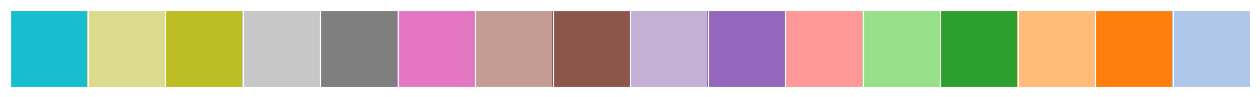

In [43]:
colors = sns.color_palette("tab20_r", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

In [44]:
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.3.1-x86_64-i386-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:17:34) [Clang 14.0.6 ]
Pandas 2.0.1
Scikit-Learn 1.2.2
SciPy 1.10.1
GPU is available


In [3]:
def plot_loss(hist, title):

    train_acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    
    data = {'Epoch': range(1, len(train_acc) + 1),
        'Training Accuracy': train_acc,
        'Validation Accuracy': val_acc,
           'Training Loss':train_loss,
           'Validation Loss':val_loss}
    df = pd.DataFrame(data)
    
    fig, ax = plt.subplots(figsize=(18,12))
    
    fig.suptitle(title, fontsize=20)
    
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Training Loss', label='Training Loss')
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Validation Loss', label='Validation Loss')
    
    ax.legend()
    
    
    return fig

In [4]:
def plot_accuracy(hist, title):

    train_acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    
    data = {'Epoch': range(1, len(train_acc) + 1),
        'Training Accuracy': train_acc,
        'Validation Accuracy': val_acc}
    df = pd.DataFrame(data)
    
    fig, ax = plt.subplots(figsize=(18,12))
    
    fig.suptitle(title, fontsize=20)
    
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Training Accuracy', label='Training Accuracy')
    sns.lineplot(ax=ax,data=df, x='Epoch', y='Validation Accuracy', label='Validation Accuracy')
    
    ax.legend()
    
    
    return fig,df

# Import data

In [5]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


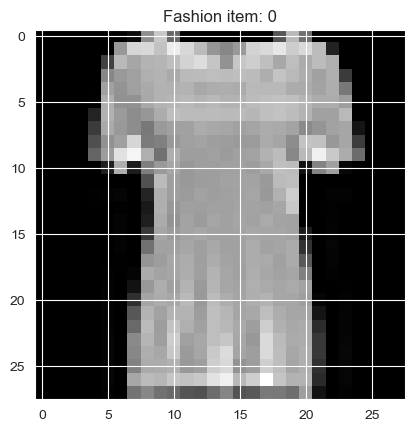

In [7]:
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(x_test.shape)   # (10000, 28, 28)
print(y_test.shape)   # (10000,)

# Access a specific image and label
image_index = 10
image = x_train[image_index]
label = y_train[image_index]

plt.imshow(image, cmap='gray')
plt.title(f"Fashion item: {label}")
plt.show()


In [8]:
image

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

### Data output 

In [9]:
classification = {
    0: "",
}

# NEURAL NETWORK EXPLORATION

Important points
For every neural network project you will do in the future, these rules always apply.

-> Start simple. Use a single layer perceptron and evaluate the result. 

-> If it is good, then proceed to deployment.

-> If the previous step is not good enough, try to get your network wider and/or deeper. Add several neurons in your single-layer perceptron. Or, add one layer into the existing network. 

-> Evaluate and, if it is good, proceed to deployment. 

-> If not, then iterate by adding more neurons or layers.
When, after adding several more layers into your network, but the results are still not good, then maybe you need to change your network architecture. 

-> Use Convolutional Neural Network (CNN) for images or Recurring Neural Network for time-series and texts.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## Perceptron - SImple Model

### Reshape it for 1D-array

In [11]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
print(x_train.shape)

(60000, 784)


### Creation of Model

In [13]:
def init_model_1():
    
    model = Sequential()
    model.add(Dense(10, input_dim=784, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [14]:
model_1 = init_model_1()

Metal device set to: Apple M1 Max


2023-05-25 09:16:00.646403: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-25 09:16:00.646445: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train model

In [16]:
with tf.device('/CPU:0'):
    history_1 = model_1.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
   9/1688 [..............................] - ETA: 11s - loss: 2.2098 - accuracy: 0.1701  

2023-05-25 09:16:01.203279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1686/1688 [============================>.] - ETA: 0s - loss: 0.6695 - accuracy: 0.7713

2023-05-25 09:16:13.044600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 13s 7ms/step - loss: 0.6693 - accuracy: 0.7714 - val_loss: 0.4821 - val_accuracy: 0.8352
Epoch 2/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4661 - accuracy: 0.8401 - val_loss: 0.4380 - val_accuracy: 0.8483
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4347 - accuracy: 0.8499 - val_loss: 0.4431 - val_accuracy: 0.8453
Epoch 4/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4171 - accuracy: 0.8548 - val_loss: 0.4150 - val_accuracy: 0.8557
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4048 - accuracy: 0.8597 - val_loss: 0.4107 - val_accuracy: 0.8588
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3984 - accuracy: 0.8605 - val_loss: 0.4057 - val_accuracy: 0.8590
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3885 - accuracy: 0.8636 - val_loss: 0.4306 - val_accuracy: 0.8

### Test

In [17]:
_, test_acc = model_1.evaluate(x_test, y_test)
print(test_acc)

  5/313 [..............................] - ETA: 4s - loss: 0.3459 - accuracy: 0.8687 

2023-05-25 09:17:58.450679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 13ms/step - loss: 0.4197 - accuracy: 0.8532
0.8532000184059143


In [18]:
print("First Simple Model Accuray is --> ", test_acc)

First Simple Model Accuray is -->  0.8532000184059143


### Analysis

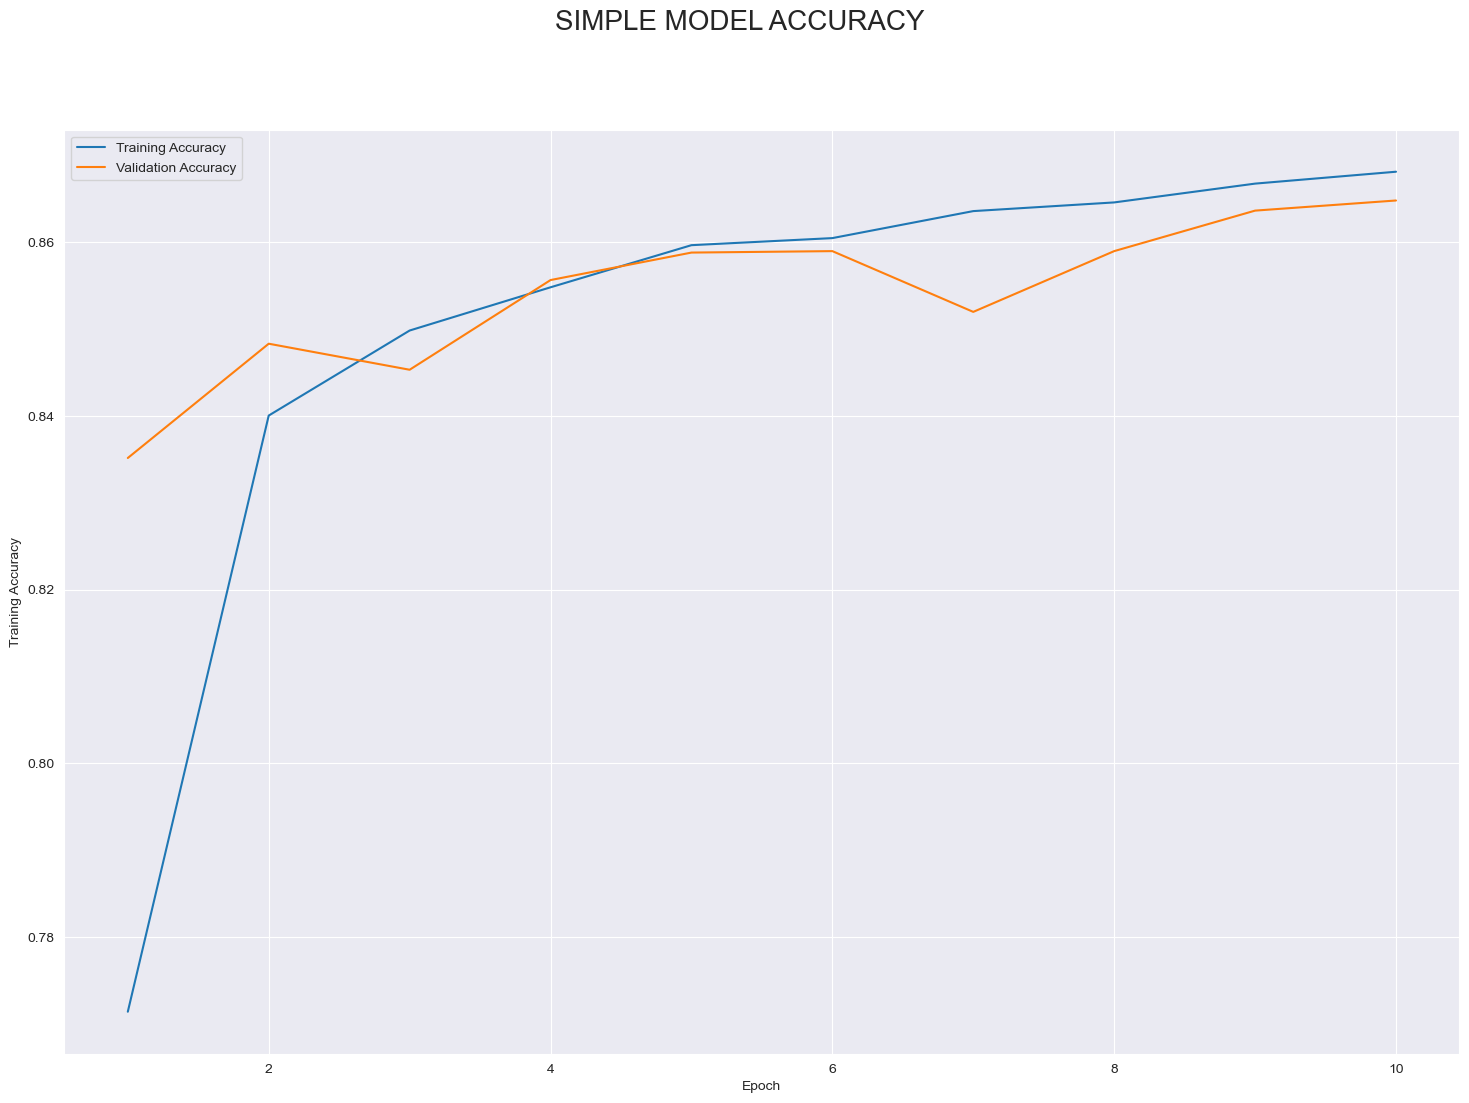

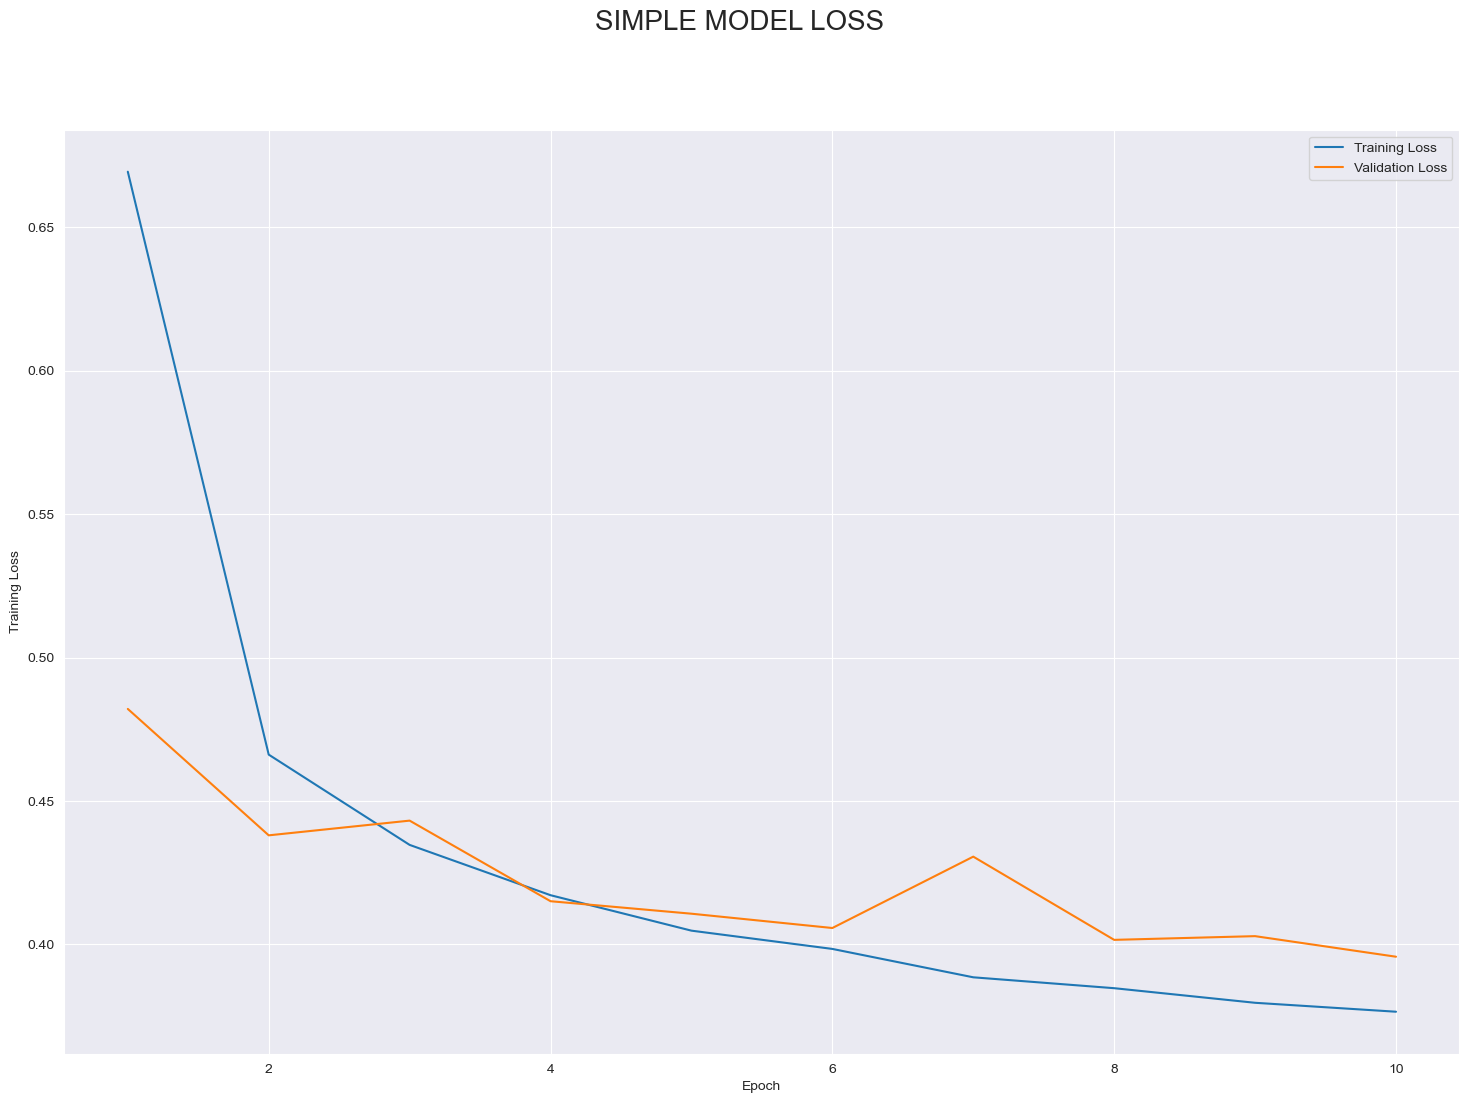

In [19]:
fig = plot_accuracy(history_1, "SIMPLE MODEL ACCURACY")
fig = plot_loss(history_1, "SIMPLE MODEL LOSS")

## Second Model - Wider

- On augmente la taille de la première couche de 10 à 50 neurones
- Le model est plus Wide

In [20]:
def init_model_2():
    
    model2 = Sequential()
    model2.add(Dense(50, input_dim=784, activation='relu'))
    model2.add(Dense(10, activation='softmax'))
    
    return model2

In [21]:
model_2 = init_model_2()
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train wider Model

In [22]:
with tf.device('/CPU:0'):
    history_2 = model_2.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
  17/1688 [..............................] - ETA: 11s - loss: 1.8122 - accuracy: 0.3952

2023-05-25 09:18:03.389735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1683/1688 [============================>.] - ETA: 0s - loss: 0.5304 - accuracy: 0.8169

2023-05-25 09:18:14.964432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 12s 7ms/step - loss: 0.5302 - accuracy: 0.8169 - val_loss: 0.4704 - val_accuracy: 0.8238
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4051 - accuracy: 0.8570 - val_loss: 0.3908 - val_accuracy: 0.8597
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3652 - accuracy: 0.8690 - val_loss: 0.3685 - val_accuracy: 0.8663
Epoch 4/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3388 - accuracy: 0.8781 - val_loss: 0.3633 - val_accuracy: 0.8703
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3197 - accuracy: 0.8835 - val_loss: 0.3600 - val_accuracy: 0.8712
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3079 - accuracy: 0.8879 - val_loss: 0.3461 - val_accuracy: 0.8773
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2937 - accuracy: 0.8923 - val_loss: 0.3509 - val_accuracy: 0.8

### Analysis

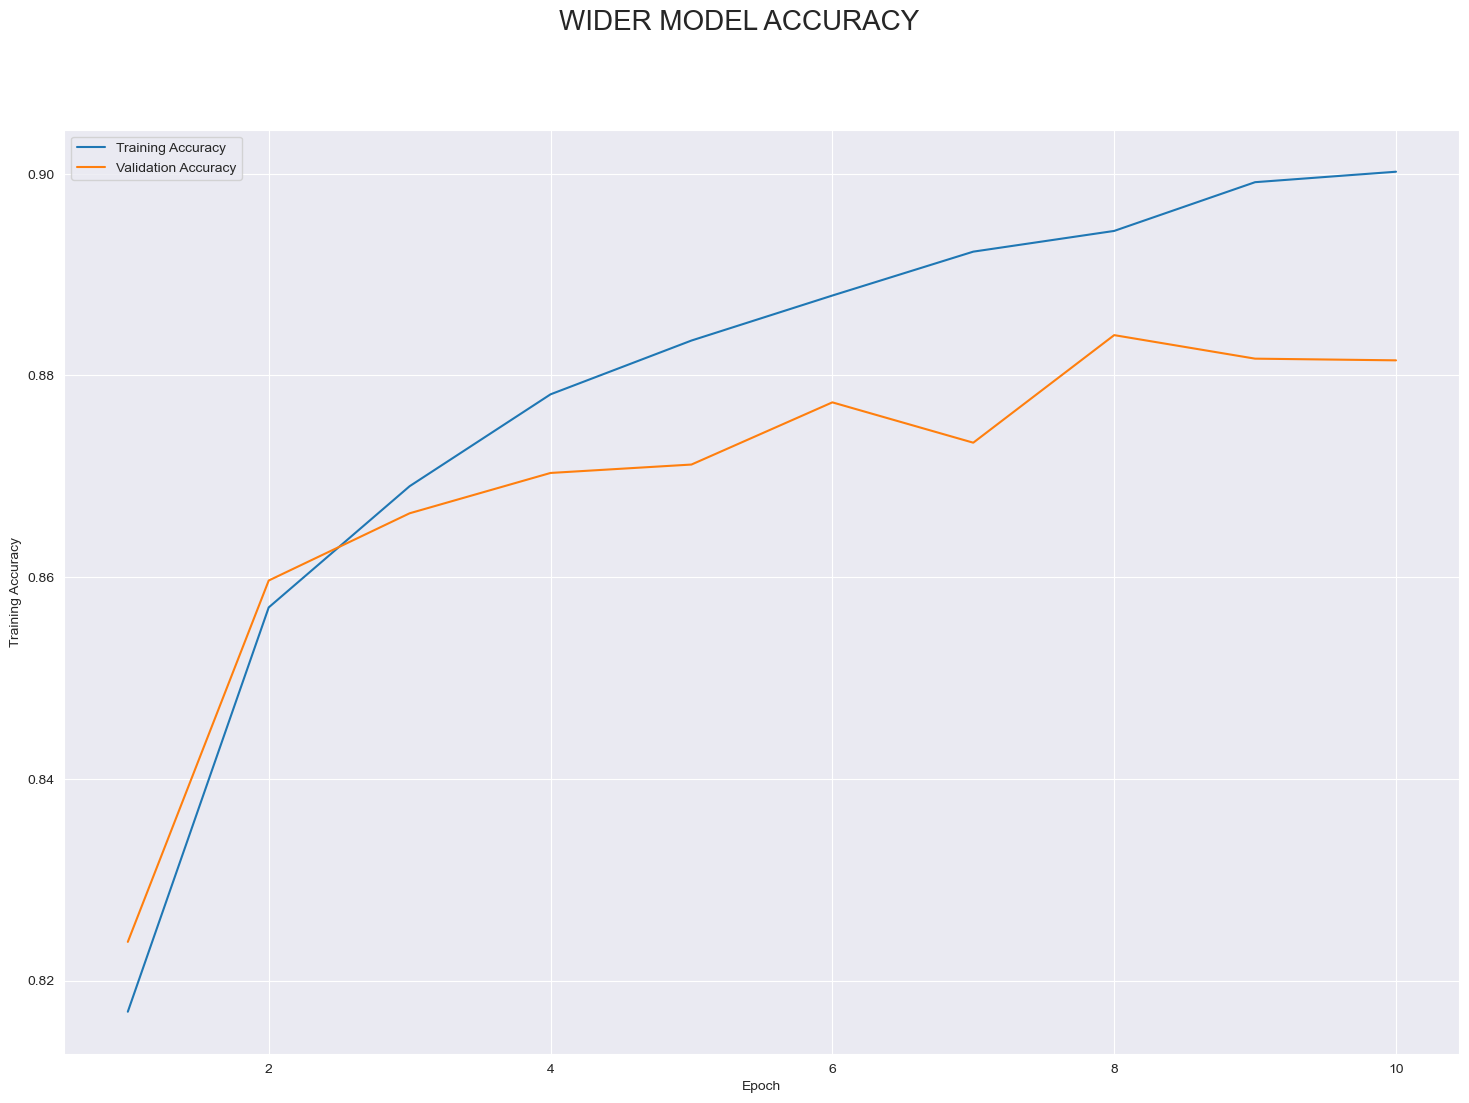

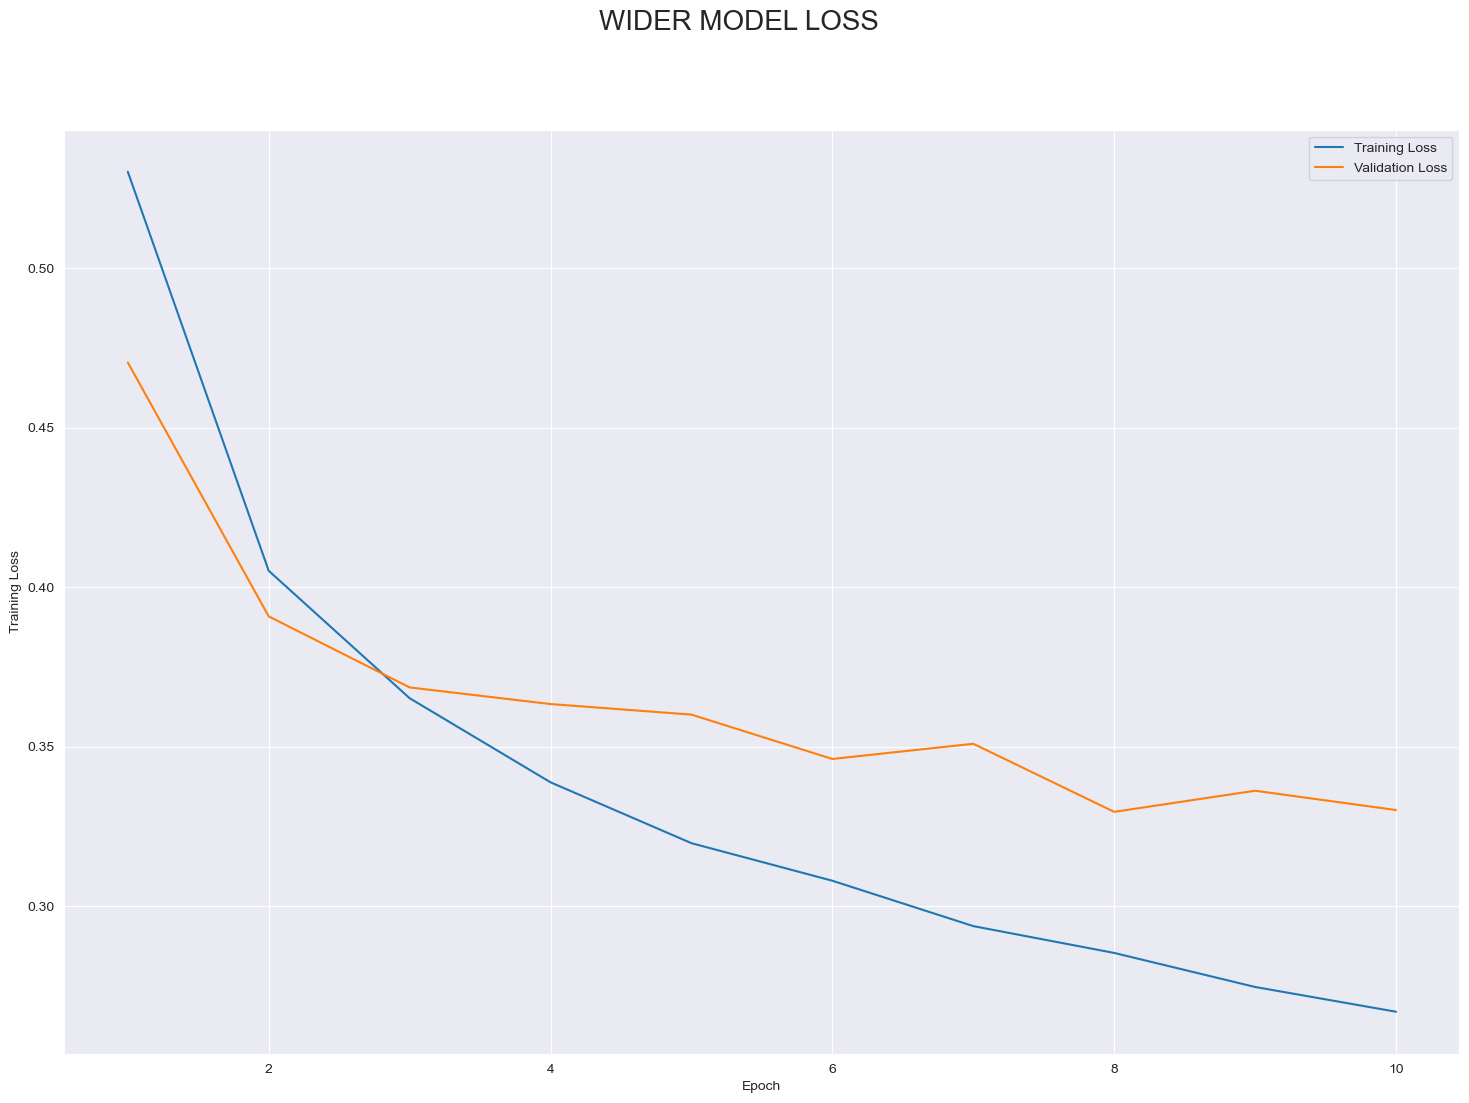

In [23]:
fig = plot_accuracy(history_2, "WIDER MODEL ACCURACY")
fig = plot_loss(history_2, "WIDER MODEL LOSS")

### Results

In [24]:
_, test_acc = model_2.evaluate(x_test, y_test)
print(test_acc)

2023-05-25 09:20:04.466951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 13ms/step - loss: 0.3533 - accuracy: 0.8753
0.8752999901771545


In [25]:
print("First WIDER Model Accuray is --> ", test_acc)

First WIDER Model Accuray is -->  0.8752999901771545


## Deeper Model

- On va augmenter le nombre de couche de neurone
- Le model devient plus deep

In [26]:
def init_model_3():
    model3 = Sequential()
    model3.add(Dense(50, input_dim=784, activation='relu'))
    model3.add(Dense(50, activation='relu'))
    model3.add(Dense(10, activation='softmax'))

    return model3

In [27]:
model_3 = init_model_3()
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
with tf.device('/CPU:0'):
    history_3 = model_3.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
   7/1688 [..............................] - ETA: 14s - loss: 2.2191 - accuracy: 0.1562  

2023-05-25 09:20:09.032520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1687/1688 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.8104

2023-05-25 09:20:23.315547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 15s 9ms/step - loss: 0.5384 - accuracy: 0.8104 - val_loss: 0.4476 - val_accuracy: 0.8353
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3964 - accuracy: 0.8578 - val_loss: 0.3763 - val_accuracy: 0.8623
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3590 - accuracy: 0.8693 - val_loss: 0.3775 - val_accuracy: 0.8663
Epoch 4/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3344 - accuracy: 0.8764 - val_loss: 0.3819 - val_accuracy: 0.8608
Epoch 5/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.3156 - accuracy: 0.8841 - val_loss: 0.3417 - val_accuracy: 0.8767
Epoch 6/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.3030 - accuracy: 0.8874 - val_loss: 0.3439 - val_accuracy: 0.8740
Epoch 7/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.2904 - accuracy: 0.8920 - val_loss: 0.3559 - val_accuracy: 0.8

### Analysis

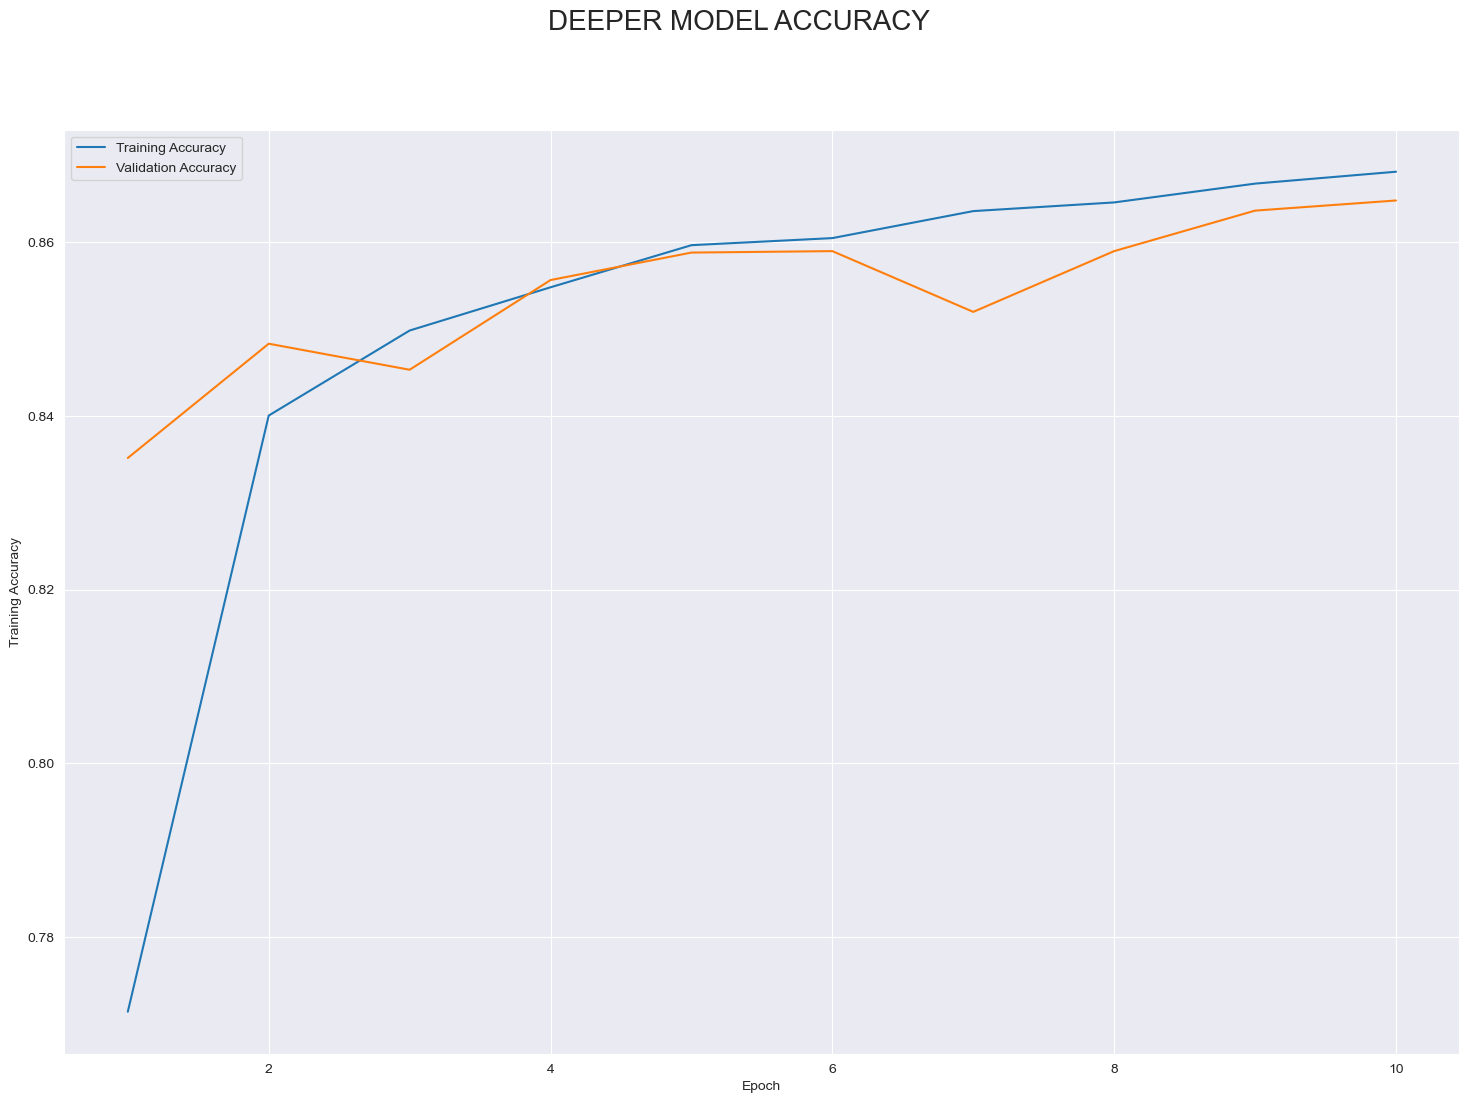

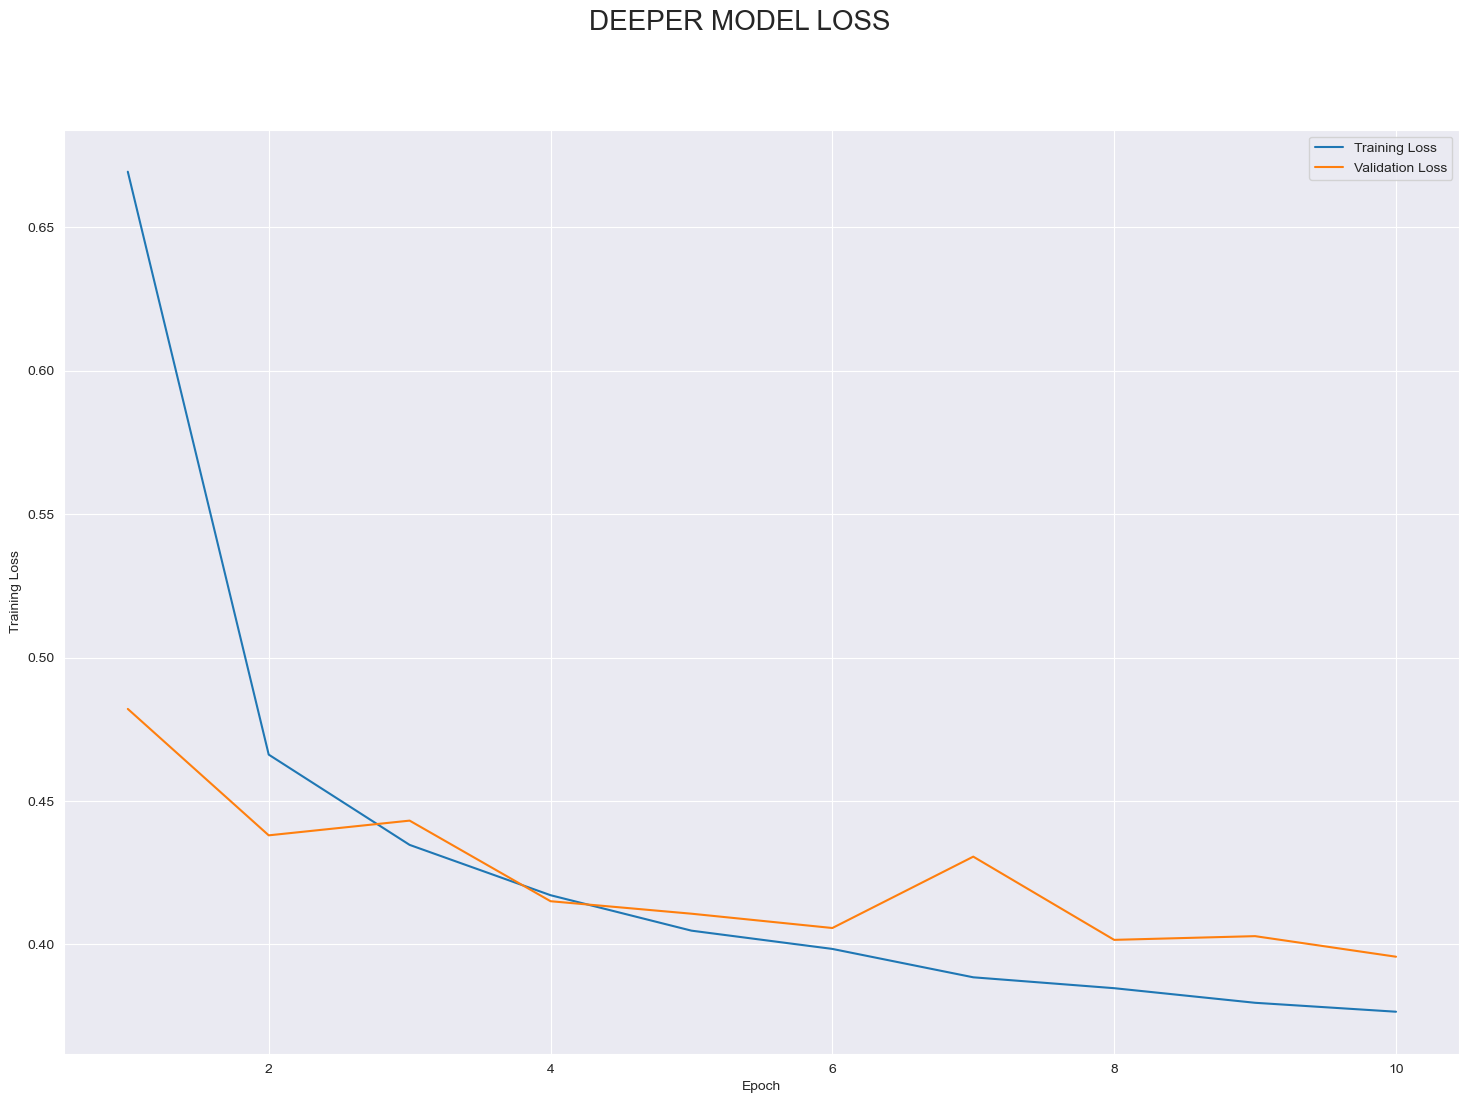

In [29]:
fig = plot_accuracy(history_1, "DEEPER MODEL ACCURACY")
fig = plot_loss(history_1, "DEEPER MODEL LOSS")

### Results

In [30]:
_, test_acc = model_3.evaluate(x_test, y_test)
print(test_acc)

  9/313 [..............................] - ETA: 4s - loss: 0.3456 - accuracy: 0.8819

2023-05-25 09:22:33.747455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 13ms/step - loss: 0.3667 - accuracy: 0.8721
0.8720999956130981


In [31]:
print("First DEEPER Model Accuray is --> ", test_acc)

First DEEPER Model Accuray is -->  0.8720999956130981


# CONVULATIONAL NEURAL NETWORK

## Reload data because the flatten shape is not the good one for CNN

In [32]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Create Model

In [33]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [34]:
def init_model_4():
    
    model4 = Sequential()
    model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
    model4.add(MaxPooling2D(pool_size=2))
    model4.add(Flatten())
    model4.add(Dense(10, activation='softmax'))
    
    return model4

In [35]:
model_4 = init_model_4()

In [36]:
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense_7 (Dense)             (None, 10)                125450    
                                                                 
Total params: 125,770
Trainable params: 125,770
Non-trainable params: 0
_________________________________________________________________


### Train Model - Epoch 10

In [38]:
with tf.device('/CPU:0'):
    history_4 = model_4.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/10
   1/1688 [..............................] - ETA: 11:59 - loss: 2.2968 - accuracy: 0.0625

2023-05-25 09:22:38.799358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1687/1688 [============================>.] - ETA: 0s - loss: 0.4392 - accuracy: 0.8451

2023-05-25 09:22:53.353855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 16s 9ms/step - loss: 0.4392 - accuracy: 0.8451 - val_loss: 0.3674 - val_accuracy: 0.8673
Epoch 2/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3116 - accuracy: 0.8909 - val_loss: 0.2944 - val_accuracy: 0.8957
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2783 - accuracy: 0.9014 - val_loss: 0.3003 - val_accuracy: 0.8912
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2568 - accuracy: 0.9081 - val_loss: 0.2918 - val_accuracy: 0.8950
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2404 - accuracy: 0.9142 - val_loss: 0.2793 - val_accuracy: 0.9003
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2266 - accuracy: 0.9190 - val_loss: 0.2734 - val_accuracy: 0.9040
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2151 - accuracy: 0.9224 - val_loss: 0.2883 - val_accuracy: 0.8

### Analysis

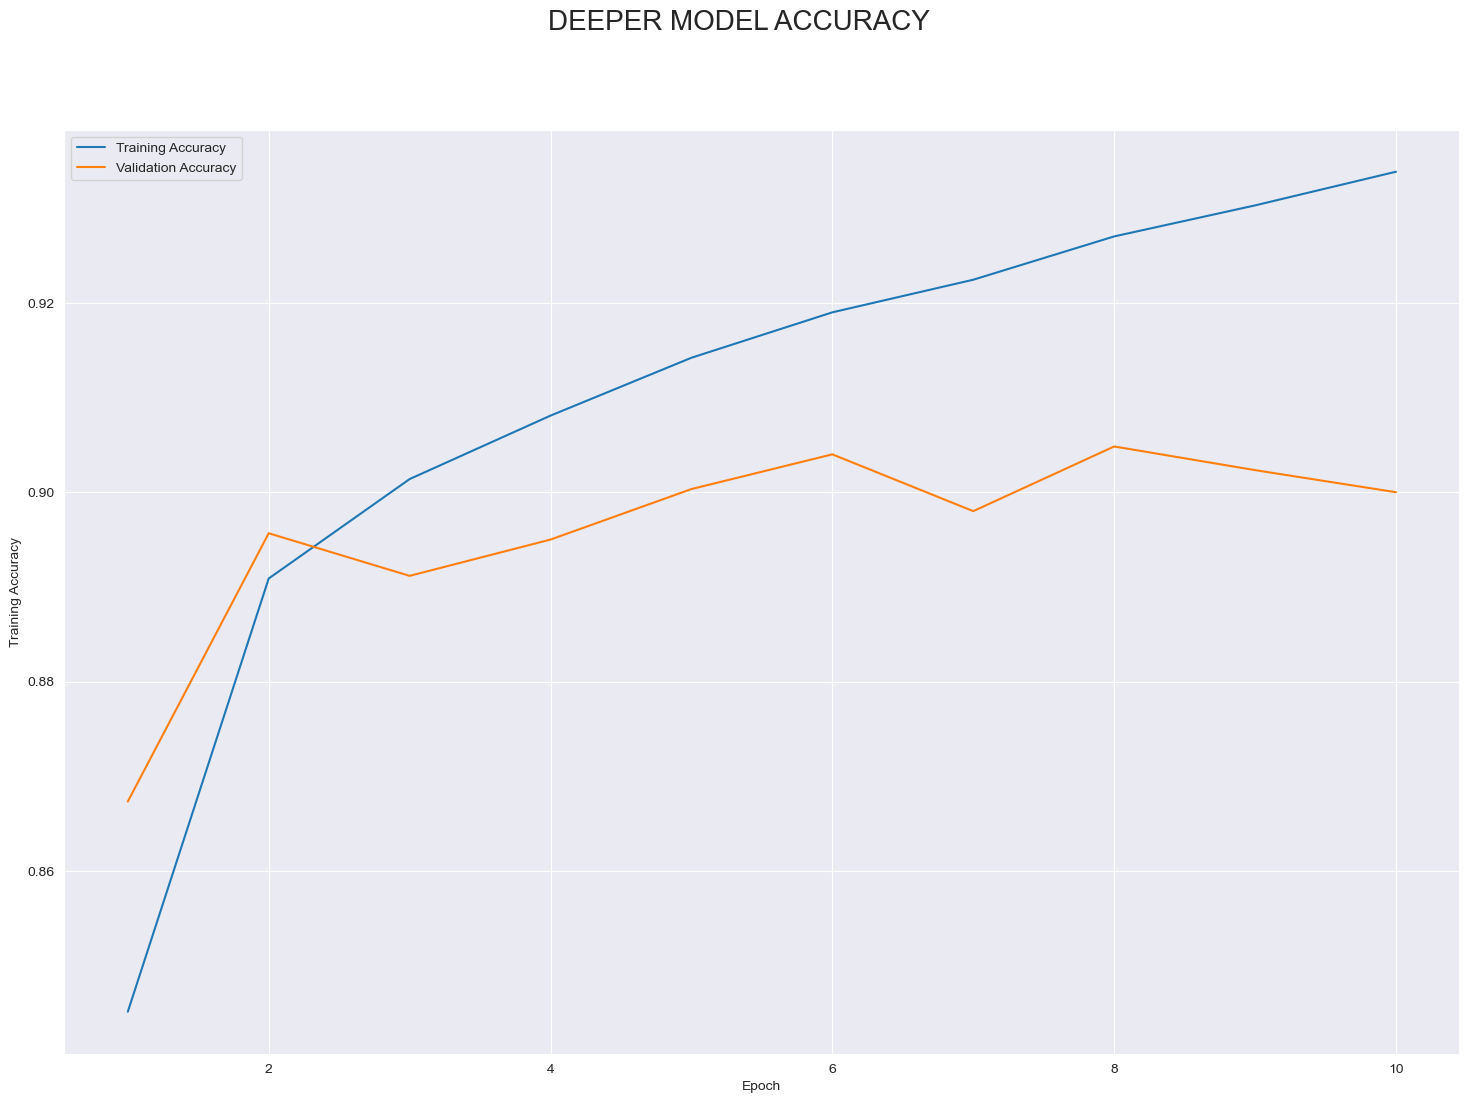

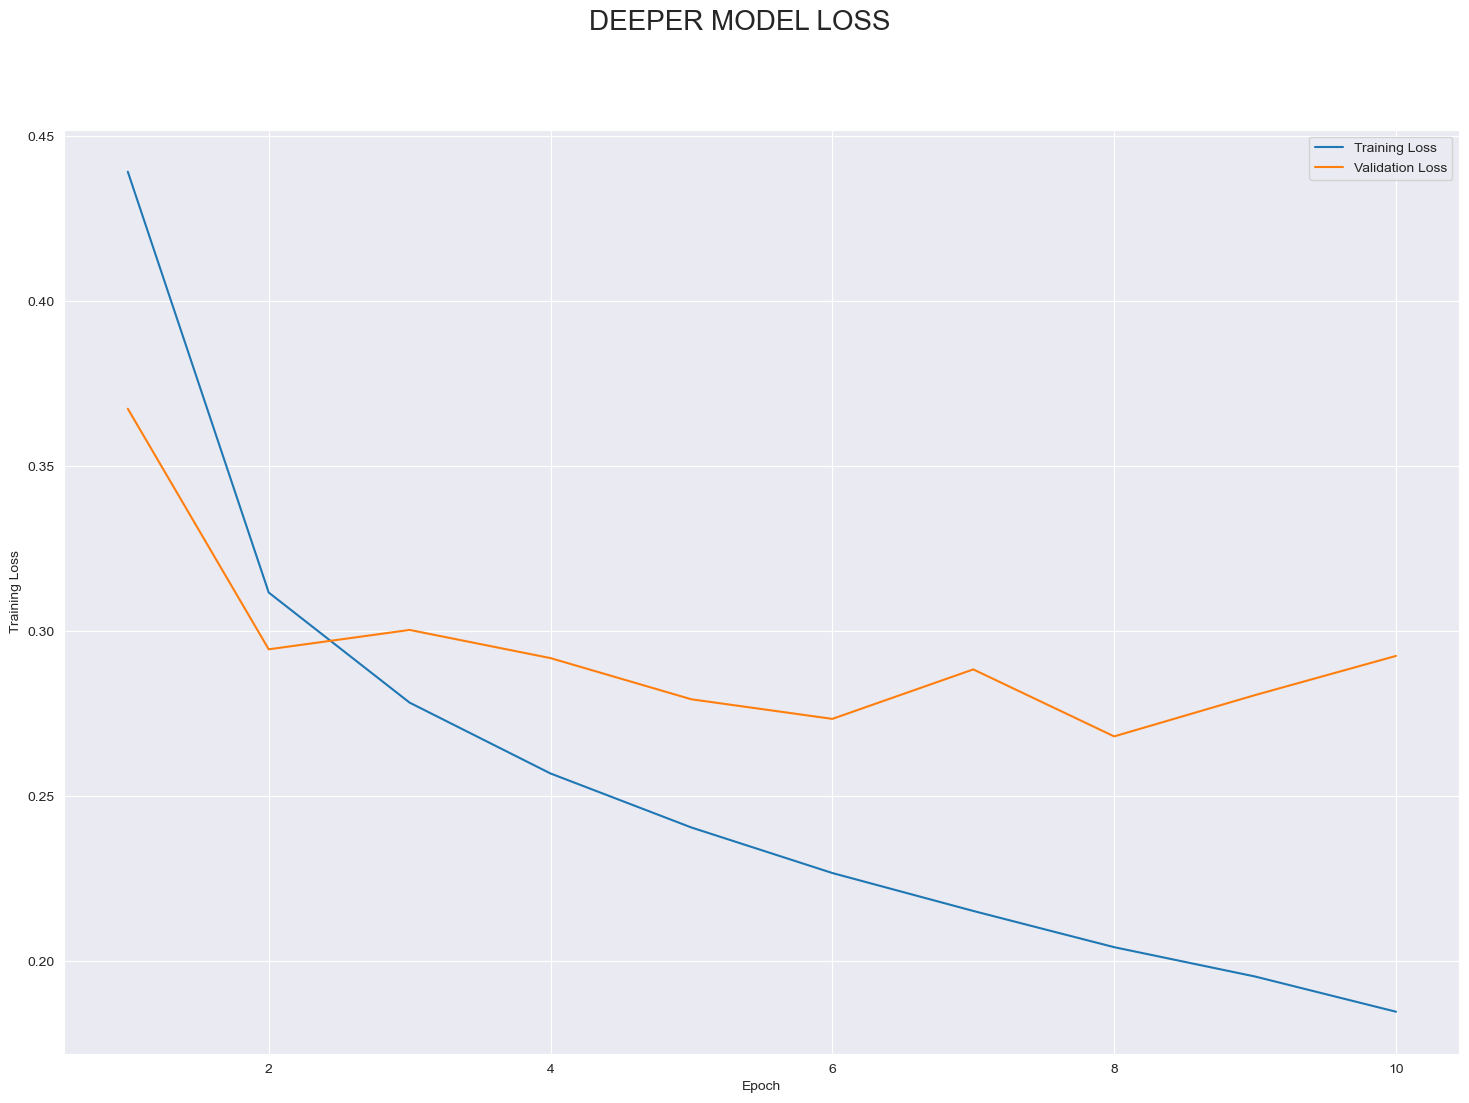

In [45]:
fig = plot_accuracy(history_4, "DEEPER MODEL ACCURACY")
fig = plot_loss(history_4, "DEEPER MODEL LOSS")

### Results

In [47]:
_, test_acc = model_4.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.3048 - accuracy: 0.8977
0.8977000117301941


## Model epoch 20

In [50]:
model_4 = init_model_4()
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
with tf.device('/CPU:0'):
    history_4 = model_4.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
  13/1688 [..............................] - ETA: 14s - loss: 1.8462 - accuracy: 0.3534

2023-05-25 10:21:20.608505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1687/1688 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.8446

2023-05-25 10:21:35.700733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 16s 9ms/step - loss: 0.4428 - accuracy: 0.8446 - val_loss: 0.3428 - val_accuracy: 0.8807
Epoch 2/20
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3171 - accuracy: 0.8878 - val_loss: 0.3191 - val_accuracy: 0.8847
Epoch 3/20
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2857 - accuracy: 0.8983 - val_loss: 0.2918 - val_accuracy: 0.8930
Epoch 4/20
1688/1688 [==============================] - 16s 10ms/step - loss: 0.2646 - accuracy: 0.9070 - val_loss: 0.2795 - val_accuracy: 0.9025
Epoch 5/20
1688/1688 [==============================] - 16s 10ms/step - loss: 0.2470 - accuracy: 0.9111 - val_loss: 0.2810 - val_accuracy: 0.8988
Epoch 6/20
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2345 - accuracy: 0.9164 - val_loss: 0.2725 - val_accuracy: 0.9037
Epoch 7/20
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2219 - accuracy: 0.9216 - val_loss: 0.2753 - val_accuracy: 0

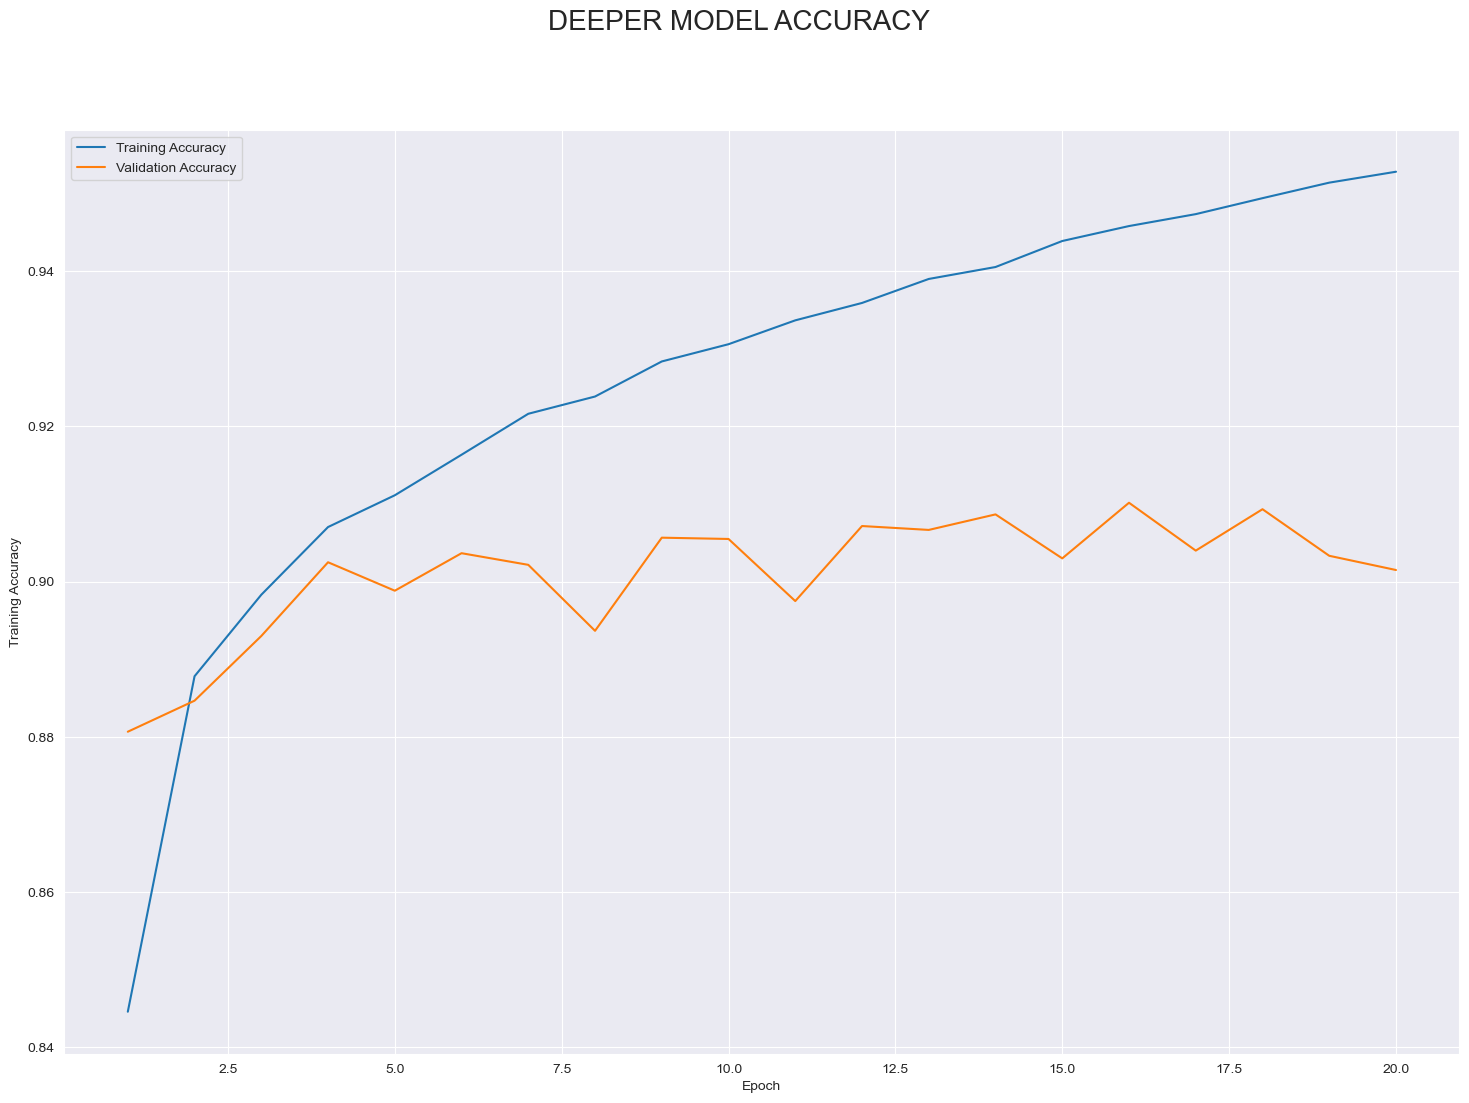

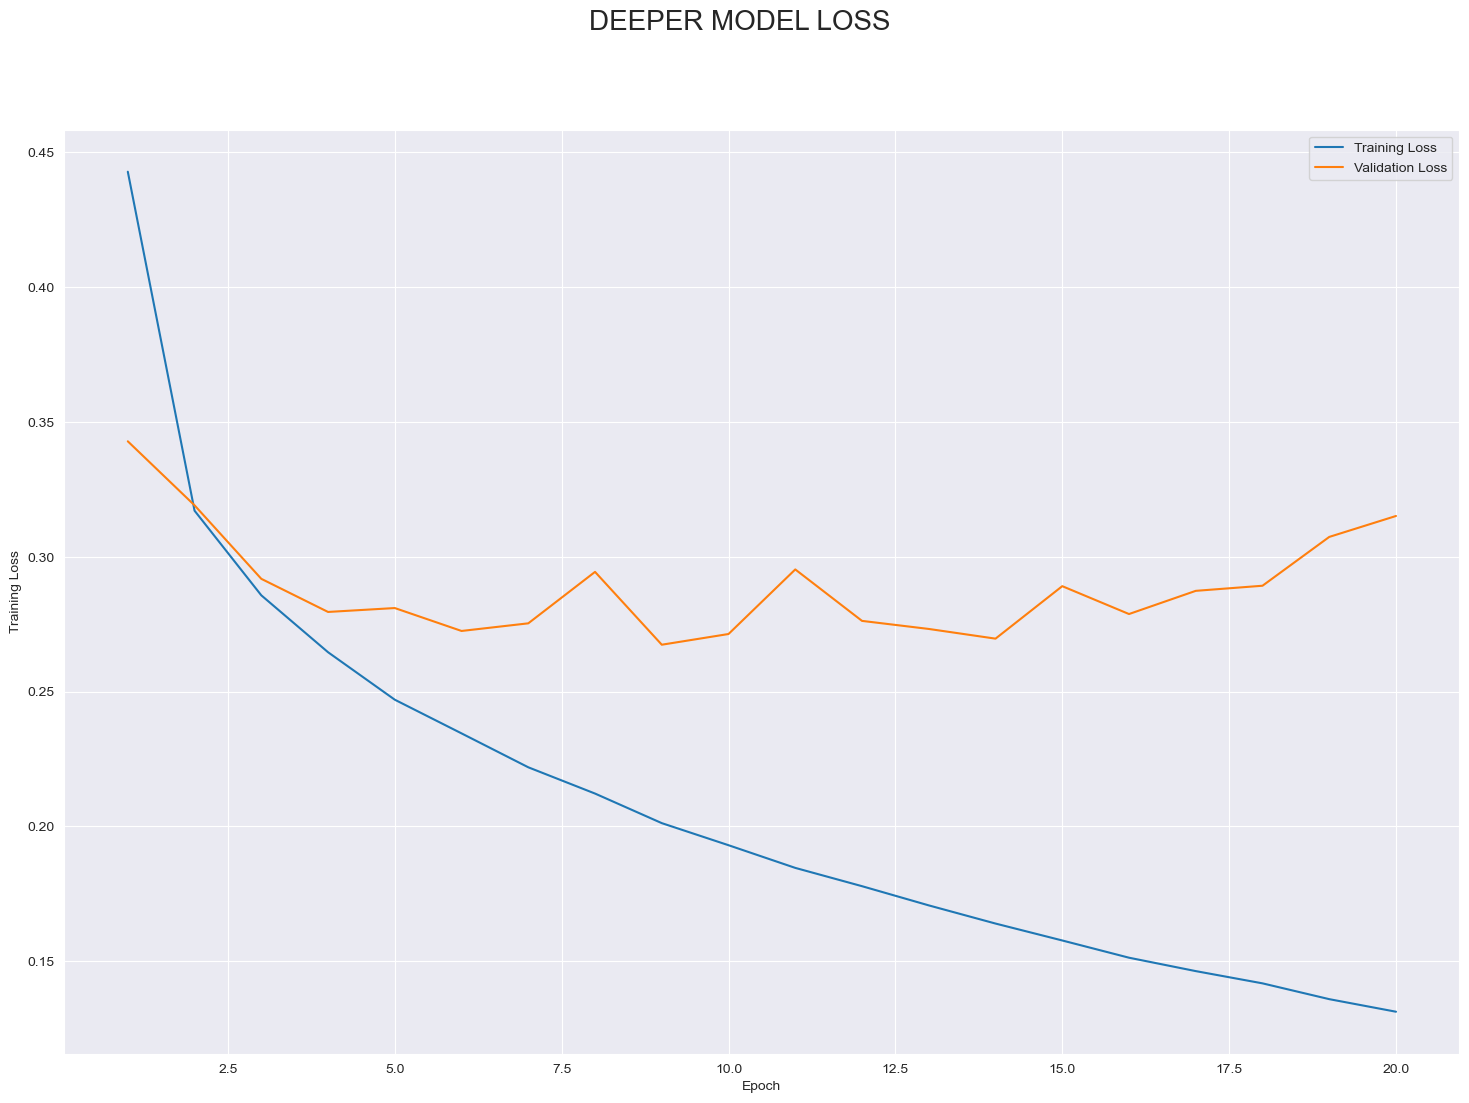

In [52]:
fig = plot_accuracy(history_4, "DEEPER MODEL ACCURACY")
fig = plot_loss(history_4, "DEEPER MODEL LOSS")

In [53]:
_, test_acc = model_4.evaluate(x_test, y_test)
print(test_acc)

 10/313 [..............................] - ETA: 3s - loss: 0.2436 - accuracy: 0.9125

2023-05-25 10:27:37.590952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 12ms/step - loss: 0.3373 - accuracy: 0.8964
0.896399974822998


# CNN poussé

In [55]:
num_classes = np.unique(y_train).shape[0]
input_shape = x_train.shape[1:] # 28, 28, 1

In [60]:
from keras import layers

In [70]:
model = keras.Sequential(
    [
        keras.Input(shape=(28,28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
        
    ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_4 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [71]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [73]:
batch_size = 64
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

with tf.device('/CPU:0'):
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.1,
        callbacks=[early_stop])

Epoch 1/20
  4/844 [..............................] - ETA: 14s - loss: 0.4870 - accuracy: 0.8359 

2023-05-25 11:25:08.336072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


843/844 [============================>.] - ETA: 0s - loss: 0.4292 - accuracy: 0.8465

2023-05-25 11:25:23.075910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


844/844 [==============================] - 16s 18ms/step - loss: 0.4292 - accuracy: 0.8466 - val_loss: 0.4106 - val_accuracy: 0.8703
Epoch 2/20
844/844 [==============================] - 15s 18ms/step - loss: 0.3489 - accuracy: 0.8759 - val_loss: 0.4003 - val_accuracy: 0.8602
Epoch 3/20
844/844 [==============================] - 15s 18ms/step - loss: 0.3166 - accuracy: 0.8855 - val_loss: 0.3336 - val_accuracy: 0.8832
Epoch 4/20
844/844 [==============================] - 15s 18ms/step - loss: 0.2918 - accuracy: 0.8946 - val_loss: 0.3156 - val_accuracy: 0.8895
Epoch 5/20
844/844 [==============================] - 15s 17ms/step - loss: 0.2735 - accuracy: 0.9005 - val_loss: 0.2963 - val_accuracy: 0.8987
Epoch 6/20
844/844 [==============================] - 15s 17ms/step - loss: 0.2596 - accuracy: 0.9063 - val_loss: 0.2817 - val_accuracy: 0.9032
Epoch 7/20
844/844 [==============================] - 15s 17ms/step - loss: 0.2471 - accuracy: 0.9104 - val_loss: 0.2709 - val_accuracy: 0.9035
Epo

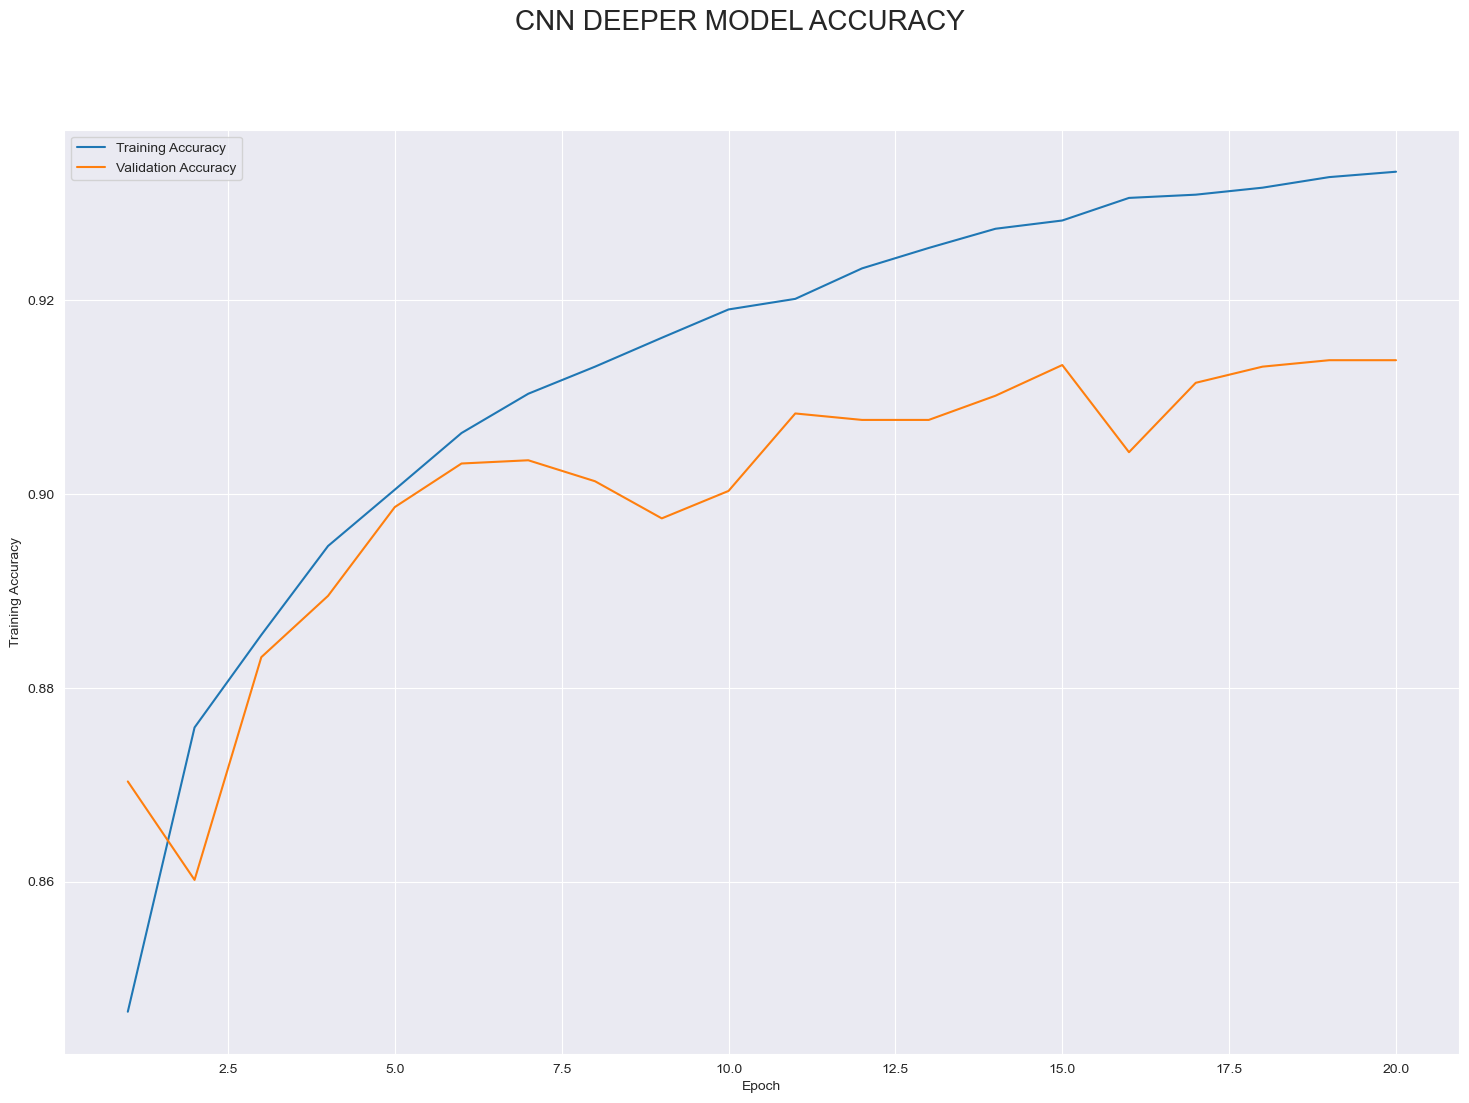

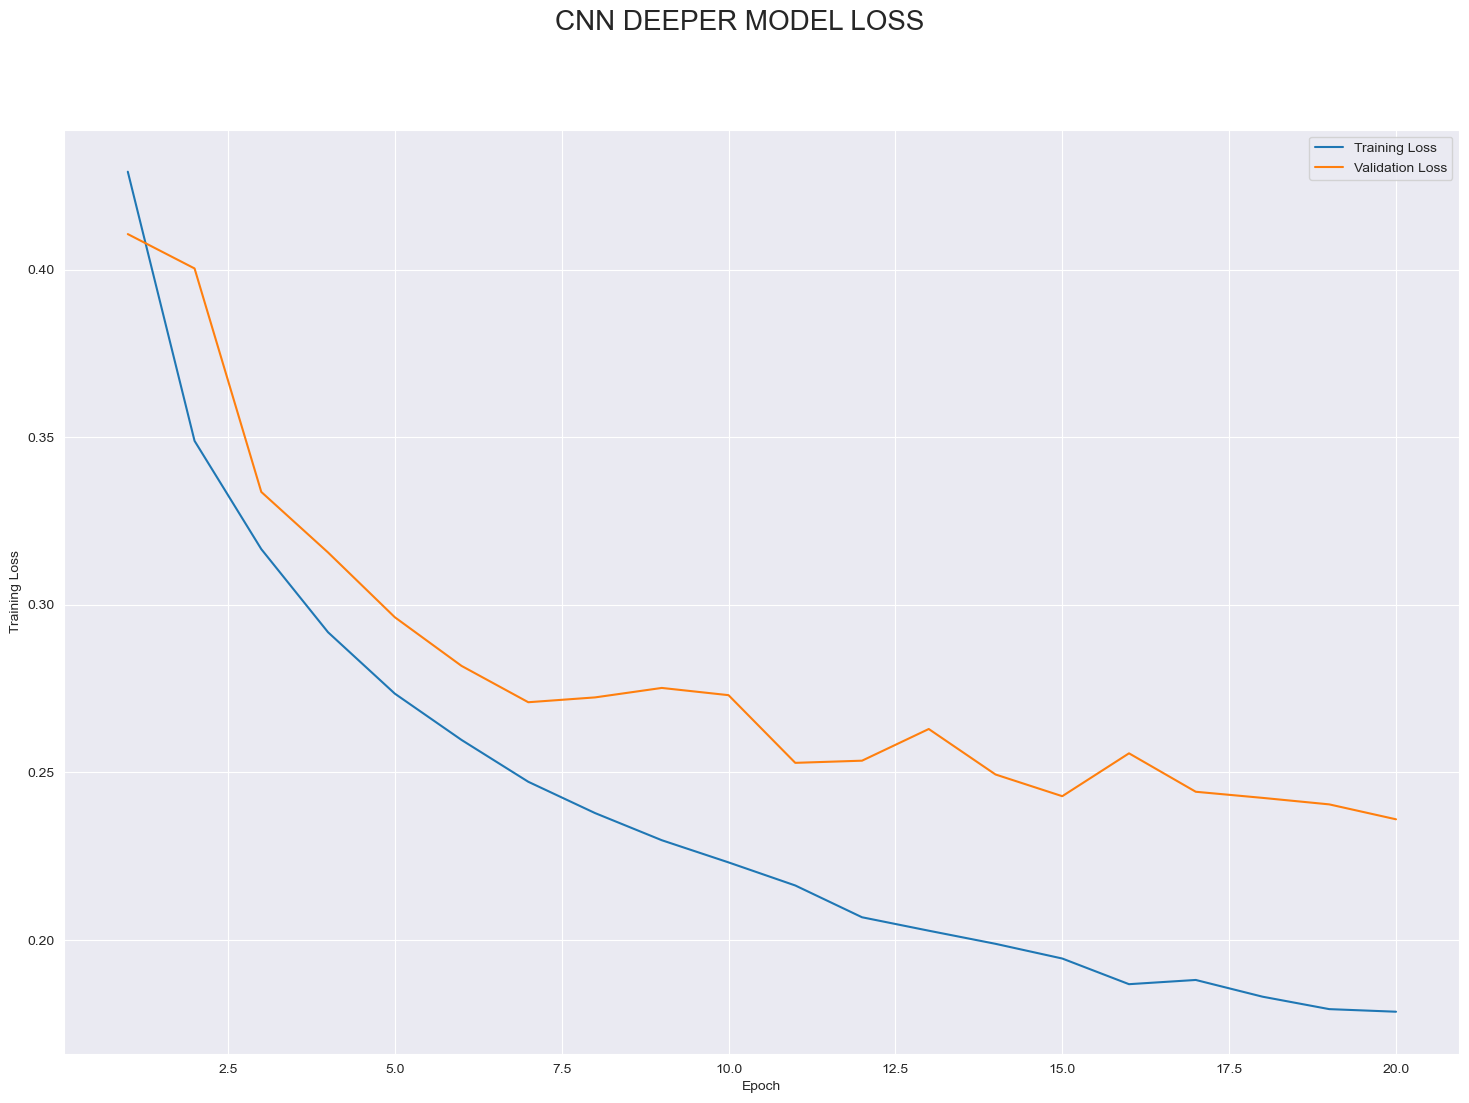

In [74]:
fig = plot_accuracy(history, "CNN DEEPER MODEL ACCURACY")
fig = plot_loss(history, "CNN DEEPER MODEL LOSS")

In [75]:
_, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

  5/313 [..............................] - ETA: 4s - loss: 0.2995 - accuracy: 0.9125 

2023-05-25 11:30:08.020503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 13ms/step - loss: 0.2486 - accuracy: 0.9120
0.9120000004768372


## Results

In [76]:
dict_label={
    0:'T-shirt/Top', 1:'Trouser',
    2:'Pullover', 3:'Dress', 4:'Coat',
    5:'Sandal', 6:'Shirt', 7:'Sneaker',
    8:'Bag', 9:'Ankle boot'
}

2023-05-25 11:31:31.930540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 17ms/step


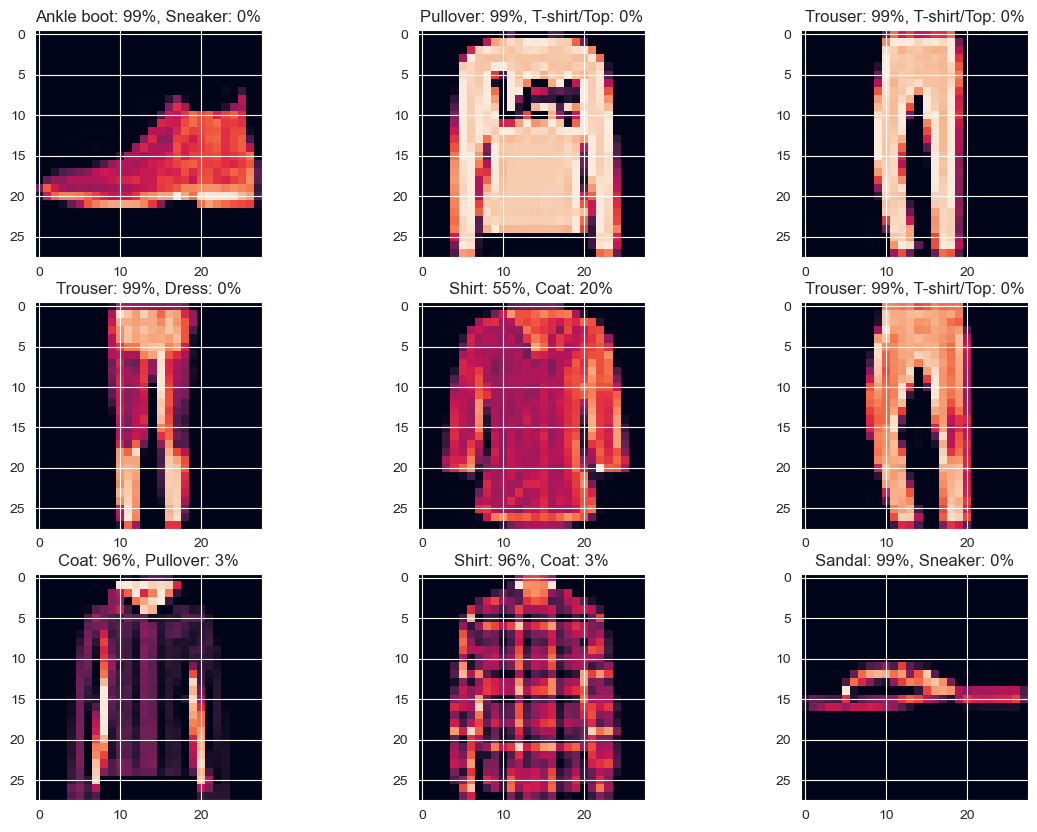

In [78]:
j = 10
fig, axes = plt.subplots(int(j//3), 3, figsize=(14, 10))
axes_ = axes.flatten()
for i in range(9):
    image=x_test[i]
    axes_[i].imshow(image)
    y_pred = model.predict(x_test[[i]])[0]
    idx = np.argsort(y_pred)[-2:][::-1]
    prediction = f'{dict_label[idx[0]]}: {int(y_pred[idx[0]]*100)}%, {dict_label[idx[1]]}: {int(y_pred[idx[1]]*100)}%'
    axes_[i].set_title(prediction)
plt.show()